<a href="https://colab.research.google.com/github/Devheun/Data-Analysis/blob/main/Data_Cleansing(Lec7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>데이터 정제</h2>


> 빠진 데이터, 이상한 데이터 제거하기



빠진 데이터 찾기 - 결측치 정제하기

---

<결측치 찾기>

In [ ]:
import numpy as np
import pandas as pd

df=pd.DataFrame({'sex':['M','F',np.nan,'M','F'], #numpy의 np.nan으로 결측치 생성
                 'score':[5,4,3,4,np.nan]})

pd.isna(df) # pd.isna()를 이용해 결측치 있는지 확인 가능
pd.isna(df).sum() # pd.isna()에 sum()을 적용하면 결측치 총 몇개인지 출력

sex      1
score    1
dtype: int64

<결측치 제거하기>

In [ ]:
df.dropna(subset=['score']) # df.dropna()를 이용하여 결측치 있는 행 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [ ]:
df_nomiss=df.dropna(subset=['score']) # score 결측치 제거된 데이터 만들기
df_nomiss['score']+1 # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [ ]:
df_nomiss=df.dropna(subset=['score','sex']) # 여러 변수에 결측치 없는 데이터 추출
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
df_nomiss2=df.dropna() # 결측치가 하나라도 있으면 제거하기 (단점 : 분석에 필요한 행까지 손실된다.)
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


<결측치 대체하기>

결측치를 대체하는 방법에는 **평균값이나, 최빈값 같은 대표값을 구해 모든 결측치를 하나의 값**으로 대체하는 방법과**통계 분석 기법으로 결측치의 예상값을 추정**해 대체하는 방법 등이 있다.

In [ ]:
exam=pd.read_csv('exam.csv')
exam.loc[[2,7,14],['math']]=np.nan # df.loc[] 은 데이터의 위치 지칭, [ , ]에서 쉼표 왼쪽은 행 위치, 오른쪽은 열 위치
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
# 평균값으로 결측치 대체
exam['math'].mean() # 평균값 약 55

exam['math']=exam['math'].fillna(55) #df.fillna()을 이용해 결측값 다른 값으로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


**Practice** : 결측치가 있는 mpg 데이터를 이용해 분석문제 해결

1. drv변수와 hwy변수에 결측치가 몇 개 있는 지 확인
2. hwy변수의 결측치를 제거하고, 어떤 구동방식의 hwy평균이 높은지 확인.(하나의 pandas 구문으로)

In [ ]:
mpg=pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211],'hwy']=np.nan

# Problem 1
mpg[['drv','hwy']].isna().sum()


drv    0
hwy    5
dtype: int64

In [ ]:
# Problem 2
mpg.dropna(subset=['hwy'])\
   .groupby('drv')\
   .agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


<h4>이상치 정제하기</h4>

---



<이상치 제거하기 - 존재할 수 없는 값>

In [7]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'sex':[1,2,1,3,2,1],
                 'score':[5,4,3,4,2,6]})
df['sex']=np.where(df['sex']==3,np.nan,df['sex']) # 결측치 처리
df['score']=np.where(df['score']>5,np.nan,df['score']) # 결측치 처리
# 결측치 제거 후 분석
df.dropna(subset=['sex','score'])\
  .groupby('sex')\
  .agg(mean_score=('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


<이상치 제거하기 - 극단적인 값>

1. 논리적으로 판단해 정하기
2. 통계적인 기준을 이용하기

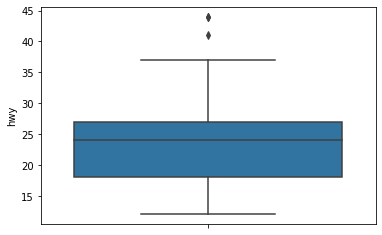

In [8]:
# 상자 그림으로 극단치 기준 정하기
import seaborn as sns
mpg=pd.read_csv('mpg.csv')
sns.boxplot(data=mpg, y='hwy')

In [15]:
# 극단치 기준값 구하기
# 1사분위수, 3사분위수 구하기
pct25=mpg['hwy'].quantile(.25) # 하위 25% 1사분위수
pct75=mpg['hwy'].quantile(.75) # 하위 75% 3사분위수

# IQR 구하기 (사분위 범위)
iqr=pct75-pct25

# 하한, 상한 구하기
# 하한 : 1사분위수보다 IQR의 1.5배만큼 더 작은값
# 상한 : 3사분위수보다 IQR의 1.5배만큼 더 큰값
pct25-1.5*iqr, pct75 + 1.5*iqr # 4,5, 40.5

# 극단치를 결측치 처리하기
mpg['hwy']=np.where((mpg['hwy']<4.5)| (mpg['hwy']>40.5),
                    np.nan, mpg['hwy'])
mpg['hwy'].isna().sum() # 출력값 : 3

# 결측치 제거하고 분석하기
mpg.dropna(subset=['hwy'])\
   .groupby('drv')\
   .agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


**Practice** : 이상치가 들어있는 mpg 데이터를 활용해 분석문제 해결

1. drv에 이상치 있는지 확인, 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인

2. 상자 그림을 이용해 cty에 이상치가 있는지 확인, 상자 그림 기준으로 정상 범위를 벗어난 값을 결측처리 한 다음 다시 상자그림을 만들어 이상치 사라졌는지 확인

3. 이상치를 제거한 다음 drv별로 cty 평균이 어떻게 다른지 알아보기 (하나의 pandas 구문으로)

In [23]:
mpg=pd.read_csv('mpg.csv')
mpg.loc[[9,13,57,92],'drv']='k' #drv 이상치 할당
mpg.loc[[28,42,128,202],'cty']=[3,4,39,42] #cty 이상치 할당

# Problem 1
mpg['drv'].value_counts().sort_index() # k가 있으면 안되는 값
mpg['drv']=np.where(mpg['drv'].isin(['4','f','r']),mpg['drv'],np.nan)
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

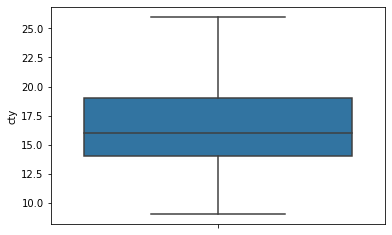

In [28]:
# Problem 2
import seaborn as sns
pct25=mpg['cty'].quantile(.25)
pct75=mpg['cty'].quantile(.75)
iqr=pct75-pct25

# 하한, 상한
pct25-1.5*iqr, pct75+1.5*iqr # 6.5 , 26.5
mpg['cty']=np.where((mpg['cty']<6.5)| (mpg['cty']>26.5),np.nan,mpg['cty'])
sns.boxplot(data=mpg,y='cty')


In [30]:
# Problem 3
mpg.dropna(subset=['drv','cty'])\
   .groupby('drv')\
   .agg(mean_cty=('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
